In [29]:
#AdvancedLaneFindingReport

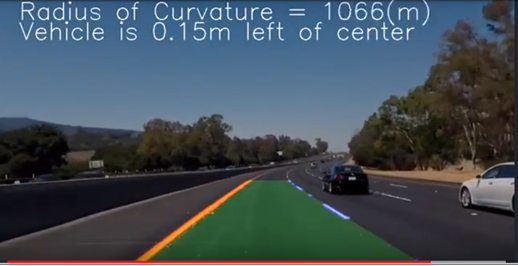

In [30]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from    findLaneUtils import *

## 1) Camera calibration :

In [31]:

calibration_dir = './calibrationImages/'
ret, CameraMat, distCoeff, rvecs, tvecs = CalculateCameraMatrix (calibration_dir) 

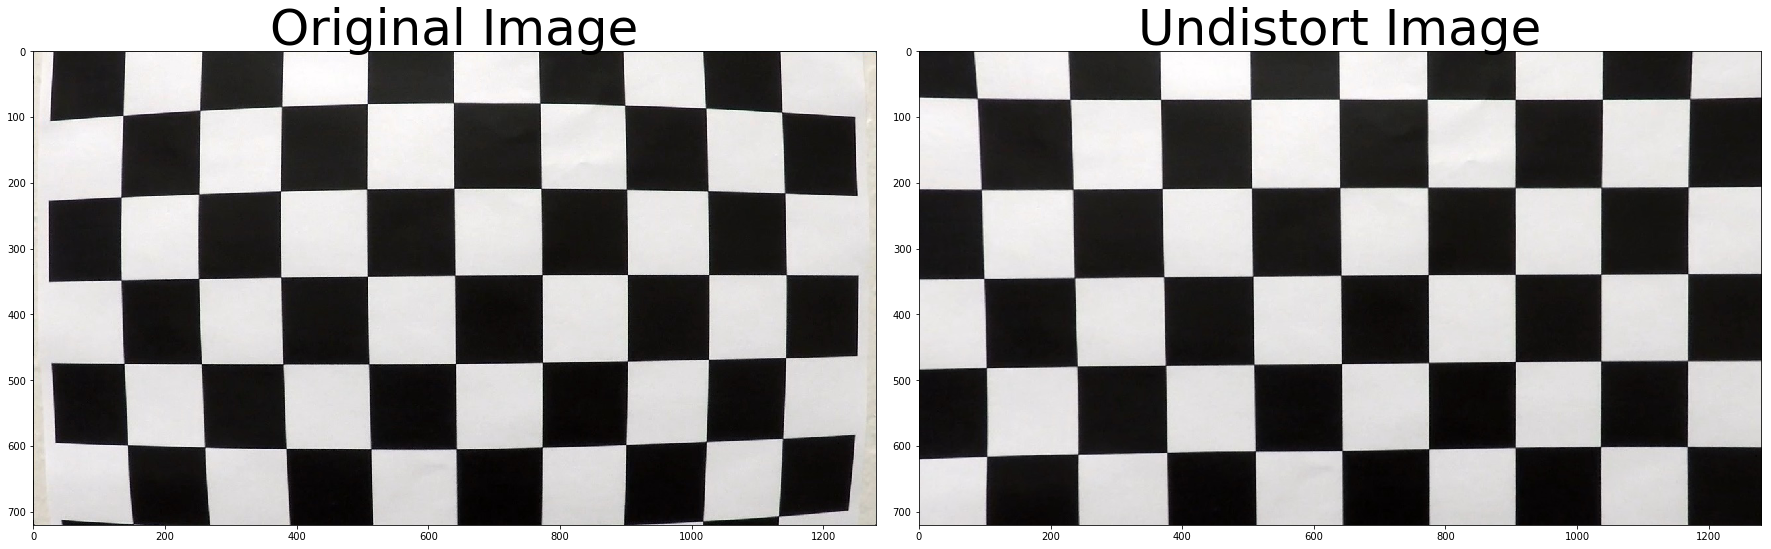

In [32]:
img_file = calibration_dir+'/calibration1.jpg'
img1 = mpimg.imread(img_file)
dst = cv2.undistort(img1, CameraMat, distCoeff, None, CameraMat)
plot_2_images (img1, dst, "Original Image", "Undistort Image")

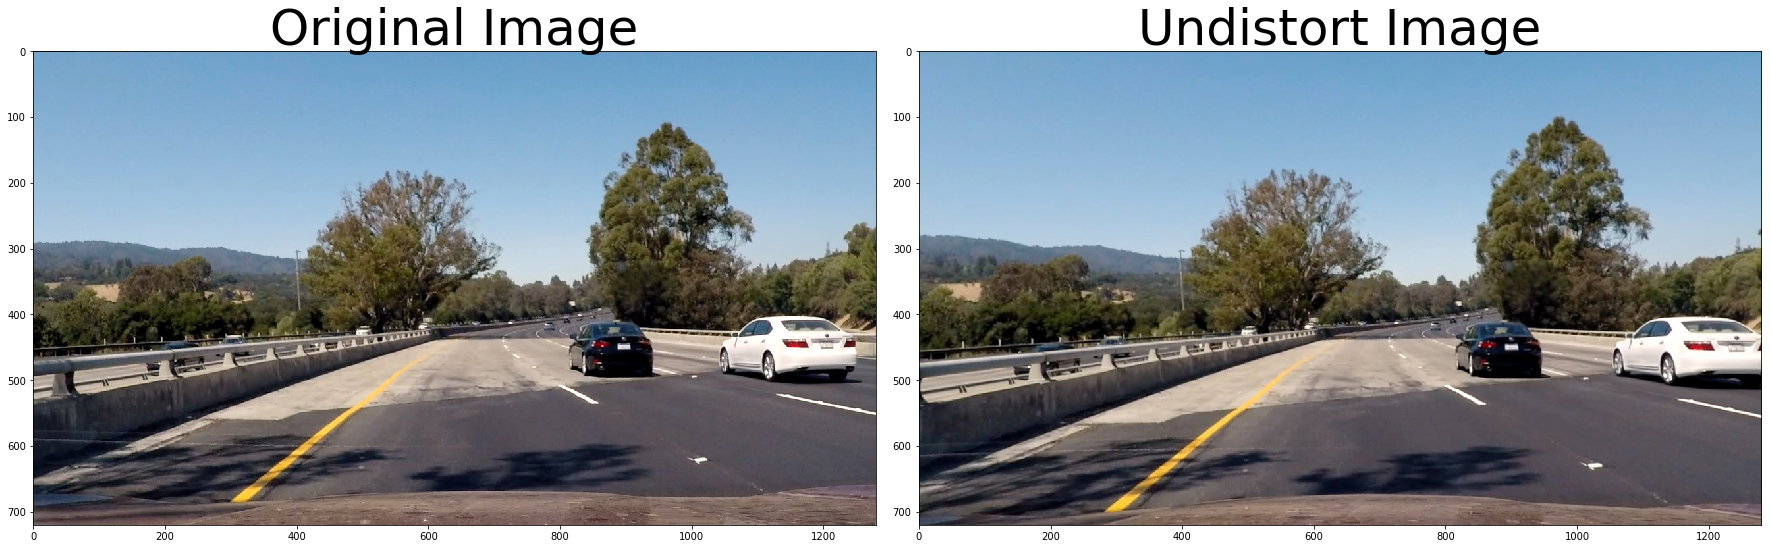

In [33]:
img_file = 'prj_img/bridge_shadow.jpg'
img1 = mpimg.imread(img_file)
undistorted_img = dst = cv2.undistort(img1, CameraMat, distCoeff, None, CameraMat)
plot_2_images (img1, dst, "Original Image", "Undistort Image")

## 2) Color and gradient threshold.

In [34]:
from    findLaneUtils import *
s_thresh = (170, 255)
sx_thresh= (20, 100)
img_file = 'prj_img/bridge_shadow.jpg'
img1 = mpimg.imread(img_file)
color_binary, combined_binary = threshold_s_sx(img1, s_thresh, sx_thresh)
color_binary2 = mpimg.imread('prj_img/color_binary2.jpg')

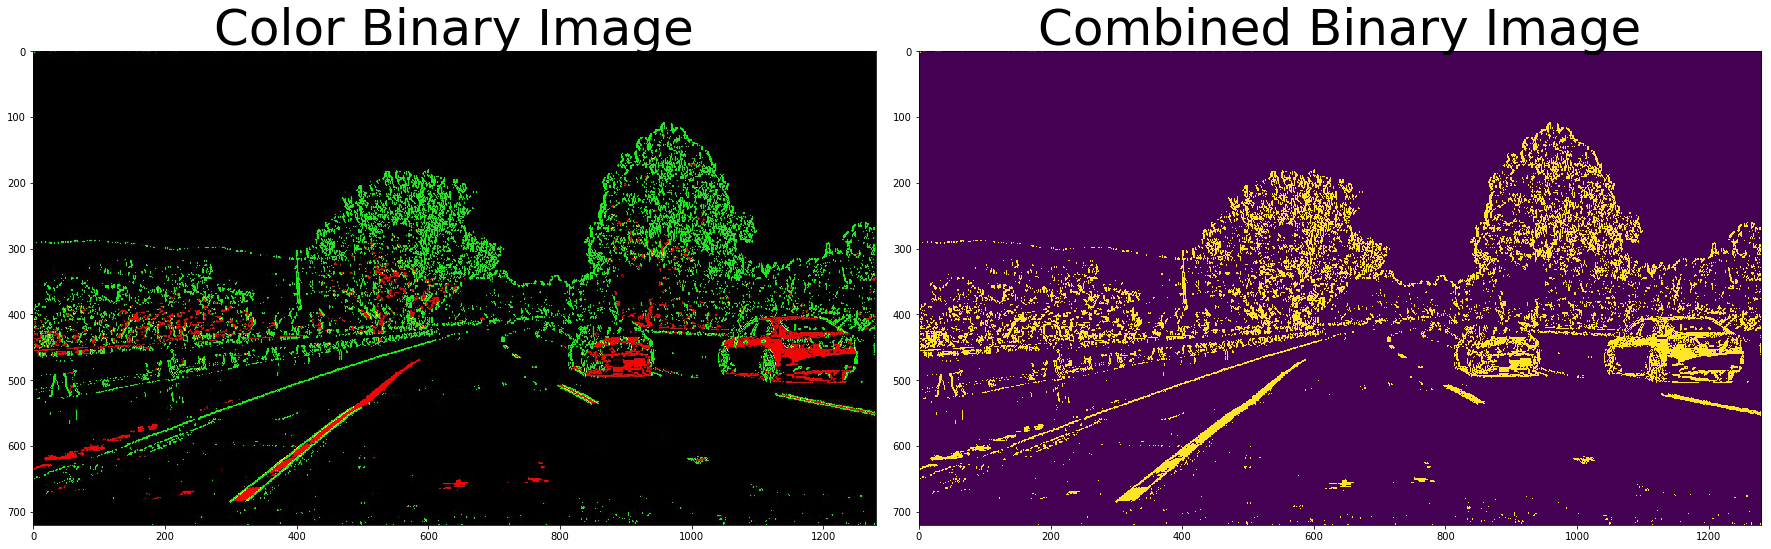

In [35]:
plot_2_images (color_binary2, combined_binary, "Color Binary Image", "Combined Binary Image")

## 3)  the Birds eye view


performed a perspective transform and provide an example of a transformed image.
define perspective coordinates.(src, dst)

In [36]:
img_size = (combined_binary.shape[1], combined_binary.shape[0])
width, height = img_size
offset = 200
src = np.float32([
    [  588,   446 ],
    [  691,   446 ],
    [ 1126,   673 ],
    [  153 ,   673 ]])

In [37]:
dst = np.float32([[offset, 0], 
    [(img_size[0] - offset), 0], 
    [(img_size[0] - offset), img_size[1]], 
    [offset, img_size[1]]])

In [38]:
M    = cv2.getPerspectiveTransform(src,dst)
Minv = cv2.getPerspectiveTransform(dst, src)
#binary_warped = cv2.warpPerspective(b_thresholded,M, (width, height))
img_size = (combined_binary.shape[1], combined_binary.shape[0])
binary_warped = cv2.warpPerspective(combined_binary,M, img_size)

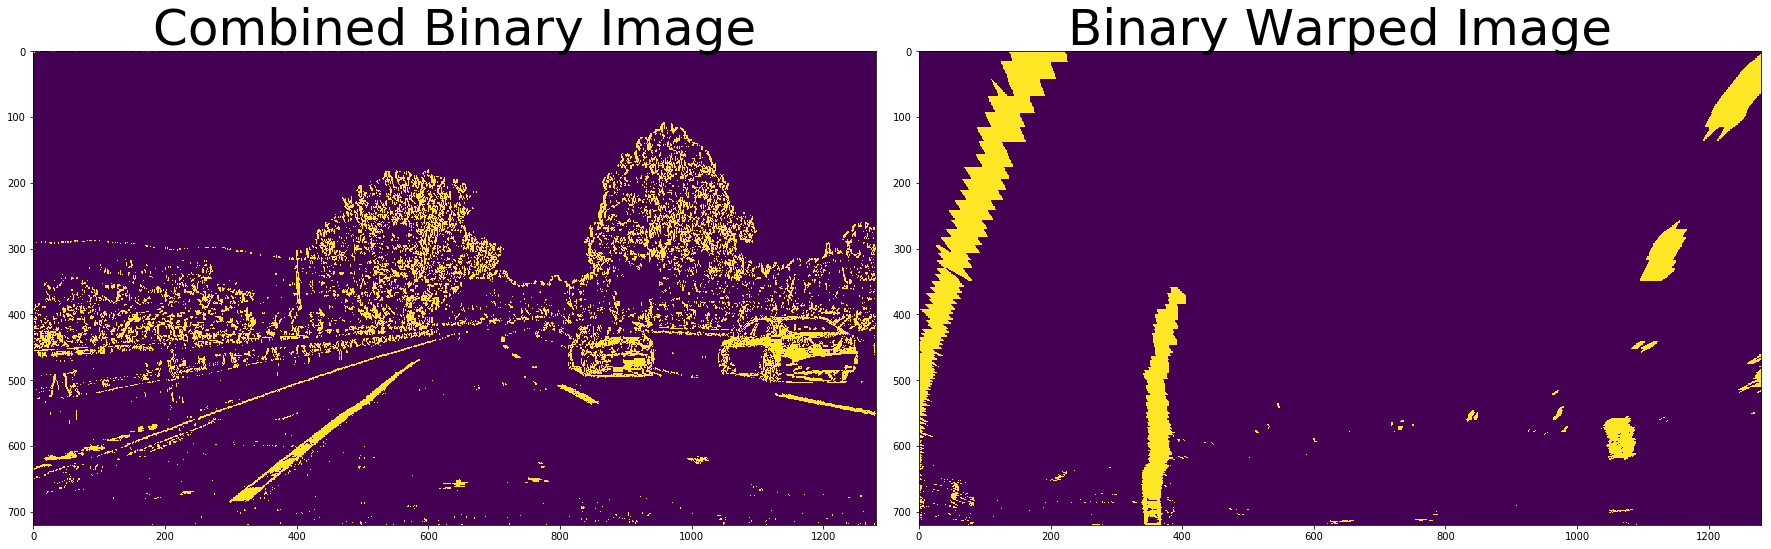

In [39]:
plot_2_images (combined_binary, binary_warped,  "Combined Binary Image", "Binary Warped Image")

In [40]:
pickle_file = "AdvLaneFinding_camera_info.p"
save_camera_info (pickle_file, CameraMat, distCoeff, M, Minv)
pickle_file = "AdvLaneFinding_camera_info.p"
CameraMat, distCoeff, M, Minv = load_camera_info (pickle_file)


## 4) Lane detection and fit.


identified lane-line pixels and fit their positions with a polynomial


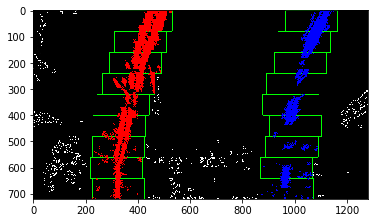

In [41]:
%matplotlib inline
from    findLaneUtils import *
binary_warped = mpimg.imread('warped-example.jpg')
out_img, left_fit, right_fit = laneDetection (binary_warped)
plt.imshow(out_img)


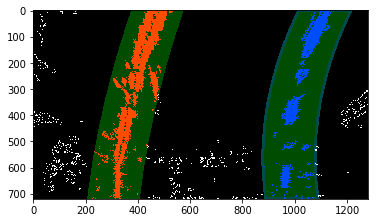

In [42]:
out_img2,  leftx, lefty, rightx, righty, ploty = laneDetectionNext (binary_warped, left_fit, right_fit)
plt.imshow(out_img2)


## 5) Curvature of lanes and vehicle position with respect to center.

calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

In [43]:
left_curverad, right_curverad = discoverCurvature (ploty, leftx, lefty, rightx, righty )
print("left curve:", left_curverad, 'm', "right curve:", right_curverad, 'm')

left curve: 1046.03640972 m right curve: 377.992604342 m


## 6) Warp back and 
## 7) Display information

Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.


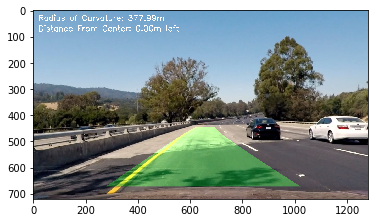

In [44]:
#new_image = warpback_display (undistorted_img, binary_warped, left_fit, right_fit, Minv, ploty, right_curverad )
new_image = warpback_display (undistorted_img, binary_warped, left_fit, right_fit, Minv,  right_curverad )
plt.imshow(new_image)

## 8) Video for the Driving Pipeline

In [45]:
from findLaneUtils import *
from proj_lane import *
from proj_pipeline import *
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [46]:
pickle_file = "AdvLaneFinding_camera_info.p"
CameraMat, distCoeff, M, Minv = load_camera_info (pickle_file)

In [47]:
e = DrivingPipeLine(CameraMat, distCoeff, M, Minv)

In [48]:
video_output = 'project_video_output.mp4'
video_input  = "project_video.mp4"

In [20]:
clip         = VideoFileClip(video_input)
video_clip   = clip.fl_image(e.pipeline)
%time video_clip.write_videofile(video_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [12:48<00:00,  1.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 12min 20s, sys: 1min 33s, total: 13min 54s
Wall time: 12min 54s


In [27]:
video_output = 'project_challenge_video_output.mp4'
video_input  = 'challenge_video.mp4' 
d = DrivingPipeLine(CameraMat, distCoeff, M, Minv)

## 8) Discusssion
